<a href="https://colab.research.google.com/github/Vedantpatil03/codsoft/blob/main/titanic_sets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For data manipulation
import pandas as pd
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Titanic-Dataset.csv to Titanic-Dataset (1).csv


In [ ]:
train = pd.read_csv("Titanic-Dataset.csv")
test = pd.read_csv("Titanic-Dataset.csv")


In [ ]:
# View the first few rows
print(train.head())

# View the dataset information
train.info()


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [ ]:
# Missing values summary
print(train.isnull().sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked       891
dtype: int64


In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",NaN,22.0,1,0,A/5 21171,7.2500,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,38.0,1,0,PC 17599,71.2833,NaN
2,3,1,3,"Heikkinen, Miss. Laina",NaN,26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,35.0,1,0,113803,53.1000,NaN
4,5,0,3,"Allen, Mr. William Henry",NaN,35.0,0,0,373450,8.0500,NaN
5,6,0,3,"Moran, Mr. James",NaN,28.0,0,0,330877,8.4583,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",NaN,54.0,0,0,17463,51.8625,NaN
7,8,0,3,"Palsson, Master. Gosta Leonard",NaN,2.0,3,1,349909,21.0750,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",NaN,27.0,0,2,347742,11.1333,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",NaN,14.0,1,0,237736,30.0708,NaN


In [ ]:
# Define features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = train[features]
y = train['Survived']
X_test = test[features]


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on validation set
y_pred = model.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(classification_report(y_val, y_pred))


Accuracy: 0.7318435754189944
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       105
           1       0.70      0.61      0.65        74

    accuracy                           0.73       179
   macro avg       0.73      0.71      0.72       179
weighted avg       0.73      0.73      0.73       179



In [ ]:
# Predict on test data
test_predictions = model.predict(X_test)

# Prepare submission file
submission = pd.DataFrame({
    'PassengerId': test['PassengerId'],
    'Survived': test_predictions
})
submission.to_csv('submission.csv', index=False)


In [ ]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

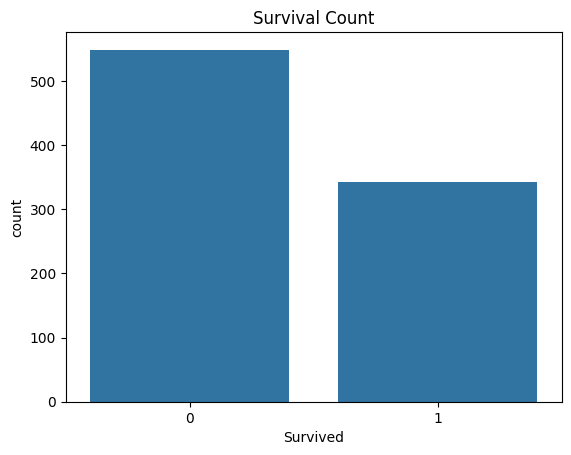

In [ ]:
sns.countplot(data=train, x='Survived')
plt.title('Survival Count')
plt.show()


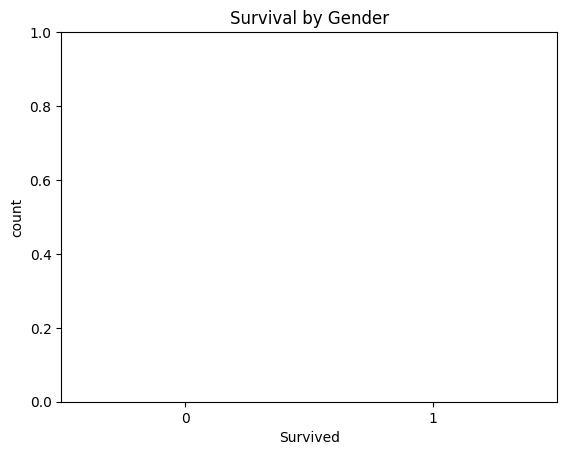

In [ ]:
sns.countplot(data=train, x='Survived', hue='Sex')
plt.title('Survival by Gender')
plt.show()


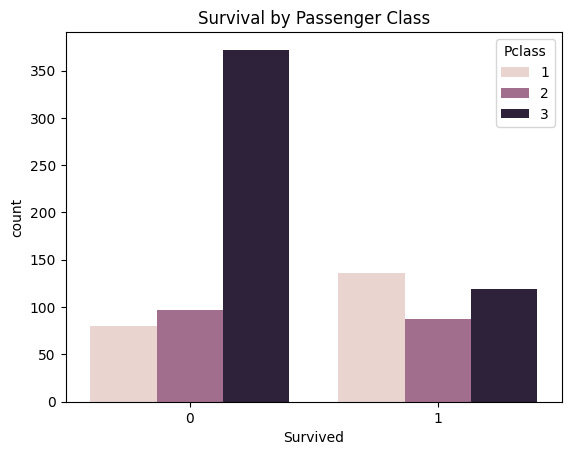

In [ ]:
sns.countplot(data=train, x='Survived', hue='Pclass')
plt.title('Survival by Passenger Class')
plt.show()


In [ ]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>